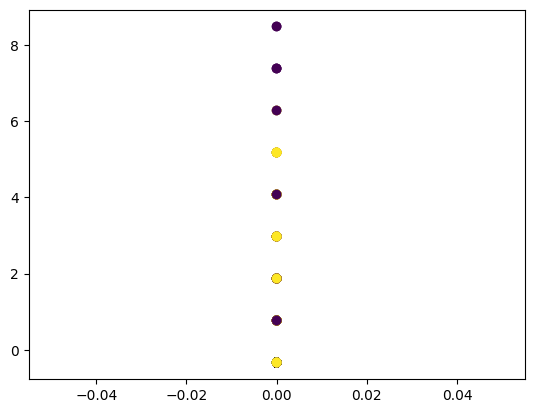

In [1]:
import numpy as np
from scipy.spatial.distance import cdist

def kmeans(x, k, no_of_iterations):
    # Step 1: Randomly choose k data points as initial centroids
    idx = np.random.choice(len(x), k, replace=False)
    centroids = x[idx, :]

    # Step 2: Assign each data point to the closest centroid
    distances = cdist(x, centroids, 'euclidean')
    points = np.array([np.argmin(i) for i in distances])

    # Step 3: Update centroids by taking the mean of each cluster
    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            temp_cent = x[points == idx].mean(axis=0)
            centroids.append(temp_cent)
        centroids = np.vstack(centroids)
        distances = cdist(x, centroids, 'euclidean')
        points = np.array([np.argmin(i) for i in distances])

    return points

# Example usage
# Load the dataset
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load the digits dataset
digits = load_digits()
X_train = StandardScaler().fit_transform(digits.data)

# Run the K-Means clustering algorithm
k = 3
no_of_iterations = 100
cluster_labels = kmeans(X_train, k, no_of_iterations)

# Visualize the clusters
import matplotlib.pyplot as plt
plt.scatter(X_train[:, 0], X_train[:, 1], c=cluster_labels)
plt.show()